# 02 - Lasso Regression Baseline
This notebook implements a Lasso regression model using the cleaned Framingham dataset.
We'll train a model, evaluate performance, and save the result for later comparison.

## Step 1: Load Cleaned Data

In [1]:
import pandas as pd

# Load processed dataset
df = pd.read_csv("../../data/processed/cleaned_framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Step 2: Define Features and Target

In [3]:
# Define target and features
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

## Step 3: Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Train Lasso Regression Model

In [5]:
from sklearn.linear_model import Lasso

# Instantiate and train model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

## Step 5: Evaluate Model

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict and evaluate
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R² Score: 2:.4f}")

MSE: 0.1240
R² Score: 0.1071


## Step 6: Visualize Coefficients

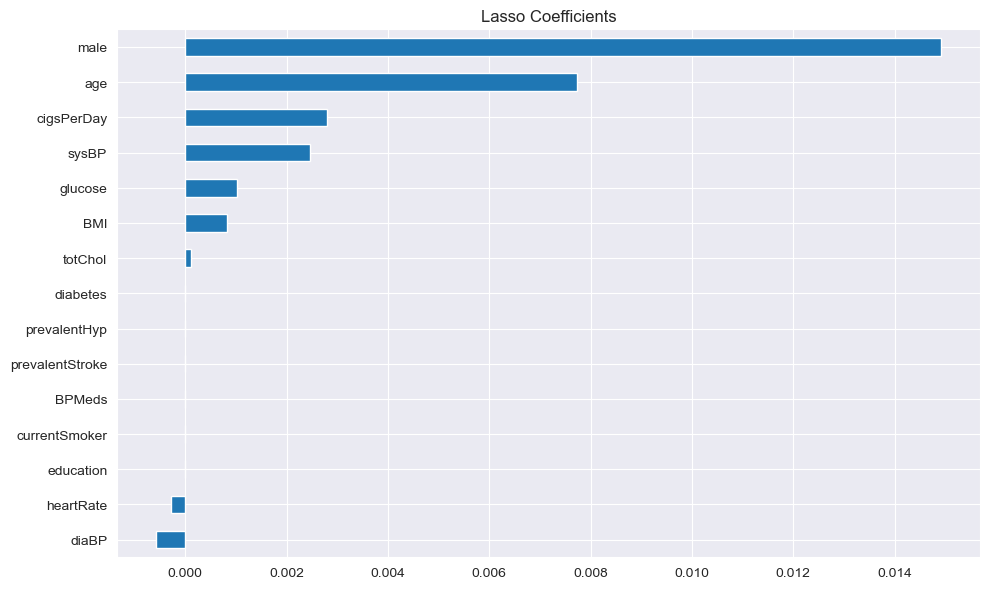

In [7]:
import matplotlib.pyplot as plt

coef = pd.Series(lasso.coef_, index=X.columns)
coef_sorted = coef.sort_values()

plt.figure(figsize=(10, 6))
coef_sorted.plot(kind='barh')
plt.title('Lasso Coefficients')
plt.tight_layout()
plt.savefig("../results/figures/lasso_coefficients.png")
plt.show()

## Step 7: Save the Trained Model

In [8]:
import joblib

# Save model
joblib.dump(lasso, "../../models/lasso_model.pkl")

['../models/lasso_model.pkl']

✅ Lasso model training complete. Metrics and model saved.

Next step: Implement a simple neural network model as a second baseline.